# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [506]:
import numpy
from keras.datasets import cifar100
import numpy as np
import os
np.random.seed(100)

# 資料準備

# Image normalize 

# 轉換label 為OneHot Encoding

In [507]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()


In [508]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [509]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [510]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [511]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [512]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [513]:
label_dict={0:"apple",1:"aquarium_fish",2:"baby",3:"bear",4:"beaver",5:"bed",6:"bee",7:"beetle",8:"bicycle",9:"bottle",
 10:"bowl",11:"boy",12:"bridge",13:"bus",14:"butterfly",15:"camel",16:"can",17:"castle",18:"caterpillar",19:"cattle",
 20:"chair",21:"chimpanzee",22:"clock",23:"cloud",24:"cockroach",25:"couch",26:"crab",27:"crocodile", 28:"cup", 
 29:"dinosaur", 30:"dolphin",31:"elephant",32:"flatfish",33:"forest",34:"fox",35:"girl",36:"hamster",37:"house", 39:"kangaroo",
 40:"keyboard", 40:"lamp",41:"lawn_mower",42:"leopard",43:"lion",44:"lizard",45:"lobster",46:"man",47:"maple_tree", 48:"motorcycle",
 49:"mountain", 50:"mouse",51:"mushroom",52:"oak_tree",53:"orange",54:"orchid",55:"otter",56:"palm_tree",57:"pear", 58:"pickup_truck",59:"pine_tree",
 60:"plain",61:"plate",62:"poppy",63:"porcupine",64:"possum",65:"rabbit",66:"raccoon",67:"ray",68:"road",69:"rocket",
 70:"rose",71:"sea",72:"seal",73:"shark",74:"shrew",75:"skunk",76:"sky",77:"snail",78:"snake",79:"spider",
 80:"squirrel",81:"streetcar",82:"sunflower",83:"sweet_pepper",84:"table",85:"tank",86:"telephone", 87:"television",
 88:"tiger",89:"tractor",
 90:"train",91:"trout",92:"tulip",93:"turtle",94:"wardrobe",95:"whale",96:"willow_tree",97:"wolf", 98:"woman",99:"worm"}

In [514]:
#導入影像列印模組
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>50: num=50
    for i in range(0,num):
        ax=plt.subplot(5,10, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

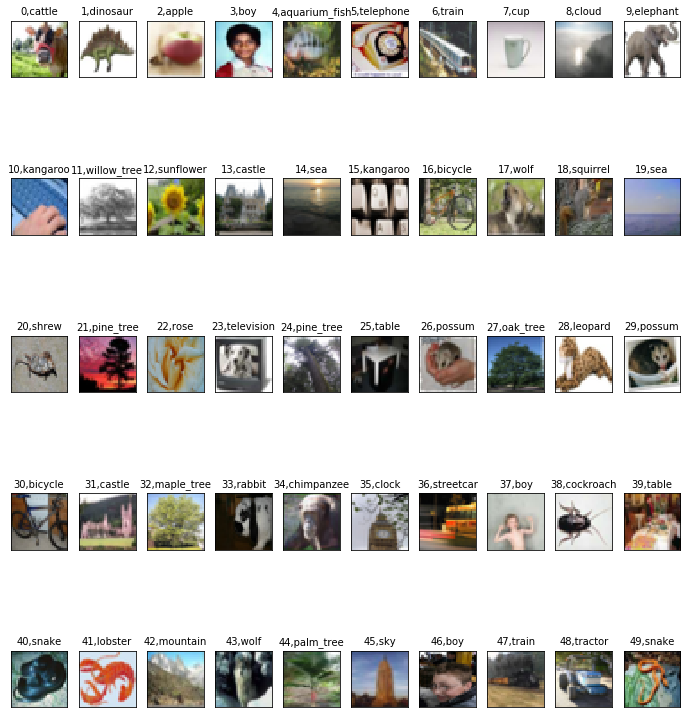

In [515]:
#針對不同的影像作標記 x_img_train,y_label_train

plot_images_labels_prediction(x_img_train,y_label_train,[],0)


In [516]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


In [517]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [518]:
x_train_normalize = x_img_train.astype('float32') / 255.0
x_test_normalize = x_img_test.astype('float32') / 255.0

In [519]:
x_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

In [520]:
y_label_train.shape

(50000, 1)

In [521]:
y_label_train[:50]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31],
       [39],
       [96],
       [82],
       [17],
       [71],
       [39],
       [ 8],
       [97],
       [80],
       [71],
       [74],
       [59],
       [70],
       [87],
       [59],
       [84],
       [64],
       [52],
       [42],
       [64],
       [ 8],
       [17],
       [47],
       [65],
       [21],
       [22],
       [81],
       [11],
       [24],
       [84],
       [78],
       [45],
       [49],
       [97],
       [56],
       [76],
       [11],
       [90],
       [89],
       [78]])

In [522]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [523]:
y_label_train_OneHot.shape

(50000, 100)

In [524]:
y_label_train_OneHot[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.